In [221]:
from keras.datasets import reuters
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [222]:
import numpy as np
length = [len (x) for x in train_data]#list comprehension
print('min:',np.min(length))
print('max:',np.max(length))
print('avg:',np.mean(length))
print('stdv:',np.std(length))
print(len(train_labels))
print(len(train_data))

min: 13
max: 2376
avg: 145.5398574927633
stdv: 145.81413013409278
8982
8982


In [223]:
word_index = reuters.get_word_index() #get the dictionary

In [224]:
print(len(word_index))

30979


In [238]:
import numpy as np
a=np.unique(train_labels)
print ('y types:',a)
print('size y:',len(a))
print(len(train_data))

y types: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
size y: 46
8982


In [226]:
reverse_word_index = dict(#the word index attributes a word to a number. we want to do the reverse, for reading the reviews
    [(value,key) for (key,value) in word_index.items()]
)

In [227]:
review = train_data[0]
label = train_labels[0]
decoded_review = ' '.join(#' '.join() will join words with blank spaces
    [reverse_word_index.get(index - 3,'?') for index in review] #go to the dictionary and get the word associated to the index. 
)#if the index is not there, write a question mark. 3 is the number of reserved words. varies from dictionary to dictionary.

print(label)
print(decoded_review)

3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [228]:
def vectorize_sequences(sequences, dimension = 10000):#create bag of words, basically [1,0,0,0,1,1,0]
    results = np.zeros((len(sequences),dimension))
    
    for i, sequence in enumerate(sequences):#goes through the sequence of words (each review) and keeps track of the sequence (that's enumerate)
        results[i,sequence] = 1.0#fancy indexing. float because keras is built on tensorflow
    return results
#x for input
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])
print(x_train[0].shape)
print(x_train.shape)

[0. 1. 1. ... 0. 0. 0.]
(10000,)
(8982, 10000)


In [229]:
from keras.utils import to_categorical
#y for output
print(len(train_labels))
y_train = np.asarray(train_labels).astype('float32')#convert labels to float32
#y_train = to_categorical(test_labels)
print(len(y_train))
y_test = np.asarray(test_labels).astype('float32')#no need to do categorical
#y_test = to_categorical(test_labels)

8982
8982


In [235]:
from keras.utils import to_categorical

y_train = to_categorical(train_labels)

y_test = to_categorical(test_labels)


x_val = x_train[:4000]#divide the data into train and validation

partial_x_val = x_train[4000:]


y_val = y_train[:4000]
#y_val = to_categorical(y_val)
partial_y_val = y_train[4000:]
#partial_y_val = to_categorical(partial_y_val)

print('BoW=',x_val[0])
print('yval=',y_val[0])

BoW= [0. 1. 1. ... 0. 0. 0.]
yval= [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [231]:
#FIRST LAYER
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512,#output nodes
                       activation='relu',#activation function,, try to always use this function
                       input_shape = (10000,)#input nodes, pixel size, 2D. we will end up with a 1D pdf [0,0,...,1,0]
))


#SUBSEQUENT LAYERS(COPY PASTE THIS PIECE OF CODE). IF IT'S THE FINAL LAYER, SELECT ACTIVATION = SOFTMAX. IF ITS AN INTERMEDIATE LAYER, SELECT RELU
model.add(layers.Dense(46,activation='softmax')) #output nodes= 46 because it is a pdf for 46 numbers,, softmax for the output layer
#INFO ON THE MODEL
model.summary()

model.compile(#NEURAL NETWORK NEEDS TO BE COMPILED
    optimizer = 'rmsprop', #GOOD OPTIMIZER FOR STARTING. NNs START WITH BIG STEPS AND REDUCE STEP SIZE
    loss='categorical_crossentropy', metrics = ['accuracy']#HOW FAR IS THE TRUE RESULT FROM THE PREDICTED RESULT. DISTANCES BETWEEN PROBABILITY DISTRIBUTION
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 512)               5120512   
_________________________________________________________________
dense_55 (Dense)             (None, 46)                23598     
Total params: 5,144,110
Trainable params: 5,144,110
Non-trainable params: 0
_________________________________________________________________


In [232]:
history = model.fit(
    x_train, y_train,
    epochs = 20,
    batch_size = 512,
    validation_split = 0.2
)

Train on 7185 samples, validate on 1797 samples
Epoch 1/20
7185/7185 [==============================] - 9s 1ms/step - loss: 1.8165 - acc: 0.6249 - val_loss: 1.1656 - val_acc: 0.7418
Epoch 2/20
7185/7185 [==============================] - 6s 830us/step - loss: 0.7513 - acc: 0.8461 - val_loss: 0.9784 - val_acc: 0.7841
Epoch 3/20
7185/7185 [==============================] - 6s 815us/step - loss: 0.4625 - acc: 0.9115 - val_loss: 0.8844 - val_acc: 0.8036
Epoch 4/20
7185/7185 [==============================] - 6s 800us/step - loss: 0.3161 - acc: 0.9350 - val_loss: 0.8595 - val_acc: 0.8125
Epoch 5/20
7185/7185 [==============================] - 6s 806us/step - loss: 0.2300 - acc: 0.9463 - val_loss: 1.2385 - val_acc: 0.6989
Epoch 6/20
7185/7185 [==============================] - 6s 816us/step - loss: 0.2011 - acc: 0.9498 - val_loss: 0.9187 - val_acc: 0.7974
Epoch 7/20
7185/7185 [==============================] - 6s 793us/step - loss: 0.1601 - acc: 0.9581 - val_loss: 0.9467 - val_acc: 0.7991
Ep

In [233]:
print(partial_x_val.shape)


(4982, 10000)


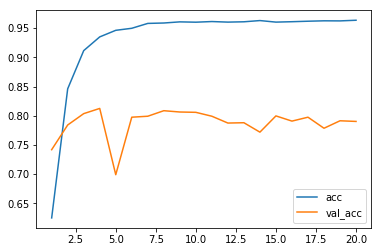

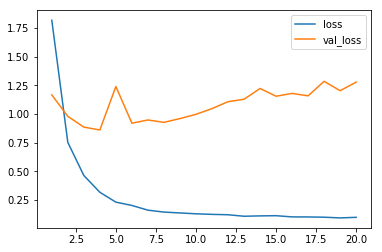

In [234]:
import matplotlib.pyplot as plt 

r = range(1,len(history.history['acc']) + 1)

plt.plot(r, history.history['acc'], label = 'acc')
plt.plot(r, history.history['val_acc'], label = 'val_acc')
plt.legend()
plt.show()
plt.close()
plt.show()

r = range(1,len(history.history['loss']) + 1)

plt.plot(r, history.history['loss'], label = 'loss')
plt.plot(r, history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()
plt.close()
plt.show()
